**IMPORTING DIFFERENT MODULES FOR COMPARING MODELS SAVED**

In [18]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

In [19]:
 filepath=r'C:\Users\dwija\OneDrive\Thyroid-Performance-Analysis\SAVED_MODEL'

In [20]:
#filepath=r'E:\College\2nd year\Winter project\Thyroid-Performance-Analysis\SAVED_MODEL'

In [21]:
with open(filepath + r'\models.pkl', 'rb') as file:
    models = pickle.load(file)

In [22]:
lstm = load_model(filepath + r'\LSTM_model.h5', compile=False)

In [23]:
ann = load_model(filepath + r'\ANN_model.h5', compile=False)

In [24]:
datasetfilepath=r'C:\Users\dwija\OneDrive\Thyroid-Performance-Analysis\Data\pre_data\Dataset.csv'

In [25]:
#datasetfilepath=r'E:\College\2nd year\Winter project\Thyroid-Performance-Analysis\Data\pre_data\Dataset.csv'

In [26]:
Dataset = pd.read_csv(datasetfilepath)

In [27]:
Dataset = Dataset.drop('Unnamed: 0', axis=1) 

In [28]:
X = Dataset.drop('Target', axis=1)  

y = Dataset['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [31]:
def results(y_test,y_pred):
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    print(f"Accuracy: {accuracy * 100:.2f}%\n")

In [32]:
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

def report(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

In [33]:
models

{'RandomForest': RandomForestClassifier(random_state=42),
 'SVC': SVC(kernel='linear'),
 'KNeighbors': KNeighborsClassifier(),
 'GradientBoosting': GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='multi:sof

**DISPLAYING THE MODEL AND THEIR PRECISION,RECALL,F1-SCORE AND THEIR ACCURACY**

In [34]:
for model_name, model in models.items():
     
    y_pred = model.predict(X_test)
    print(model_name,":")
    results(y_test, y_pred)
    report(y_test, y_pred)

RandomForest :
Precision: 90.67%
Recall: 90.47%
F1-Score: 90.57%
Accuracy: 90.47%

SVC :
Precision: 90.10%
Recall: 94.92%
F1-Score: 92.45%
Accuracy: 94.92%

KNeighbors :
Precision: 90.93%
Recall: 93.74%
F1-Score: 92.17%
Accuracy: 93.74%

GradientBoosting :
Precision: 95.95%
Recall: 89.01%
F1-Score: 91.47%
Accuracy: 89.01%

XGBoost :
Precision: 91.99%
Recall: 91.66%
F1-Score: 91.82%
Accuracy: 91.66%

BernoulliNB :
Precision: 93.90%
Recall: 94.58%
F1-Score: 92.41%
Accuracy: 94.58%

DecisionTree :
Precision: 91.21%
Recall: 90.89%
F1-Score: 91.05%
Accuracy: 90.89%



**COMPARING AND VISUALISING MODELS BASED ON THEIR PRECISION,RECALL,F1-SCORE AND THEIR ACCURACY**

In [35]:
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink']
mod = models.keys()

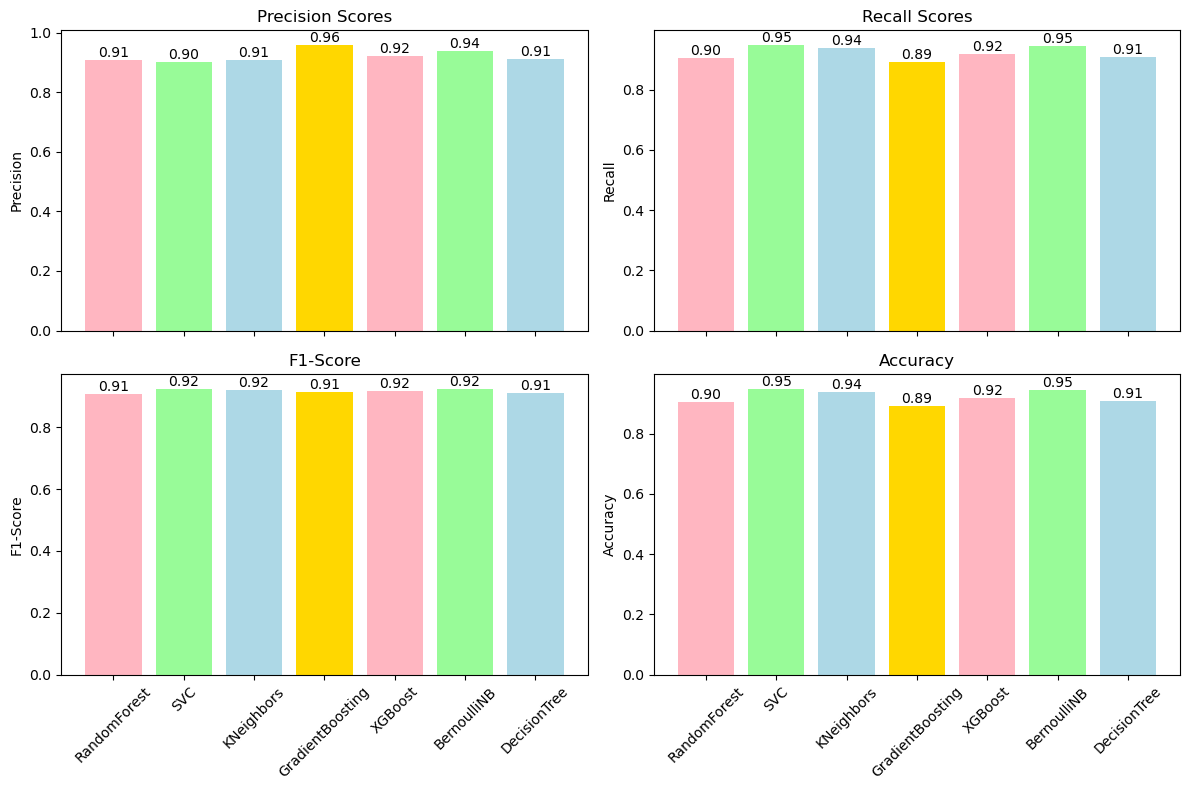

In [36]:
pastel_colors = ['#FFB6C1', '#98FB98', '#ADD8E6', '#FFD700']

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

axs[0, 0].bar(mod, precision_scores, color=pastel_colors)
axs[0, 0].set_title('Precision Scores')
axs[0, 0].set_ylabel('Precision')

for i, v in enumerate(precision_scores):
    axs[0, 0].text(i, v + 0., f'{v:.2f}', ha='center', va='bottom')

axs[0, 1].bar(mod, recall_scores, color=pastel_colors)
axs[0, 1].set_title('Recall Scores')
axs[0, 1].set_ylabel('Recall')

for i, v in enumerate(recall_scores):
    axs[0, 1].text(i, v + 0., f'{v:.2f}', ha='center', va='bottom')

axs[1, 0].bar(mod, f1_scores, color=pastel_colors)
axs[1, 0].set_title('F1-Score')
axs[1, 0].set_ylabel('F1-Score')

for i, v in enumerate(f1_scores):
    axs[1, 0].text(i, v + 0., f'{v:.2f}', ha='center', va='bottom')


axs[1, 1].bar(mod, accuracy_scores, color=pastel_colors)
axs[1, 1].set_title('Accuracy')
axs[1, 1].set_ylabel('Accuracy')


for i, v in enumerate(accuracy_scores):
    axs[1, 1].text(i, v + 0., f'{v:.2f}', ha='center', va='bottom')


plt.subplots_adjust(wspace=0.5, hspace=0.5)


for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

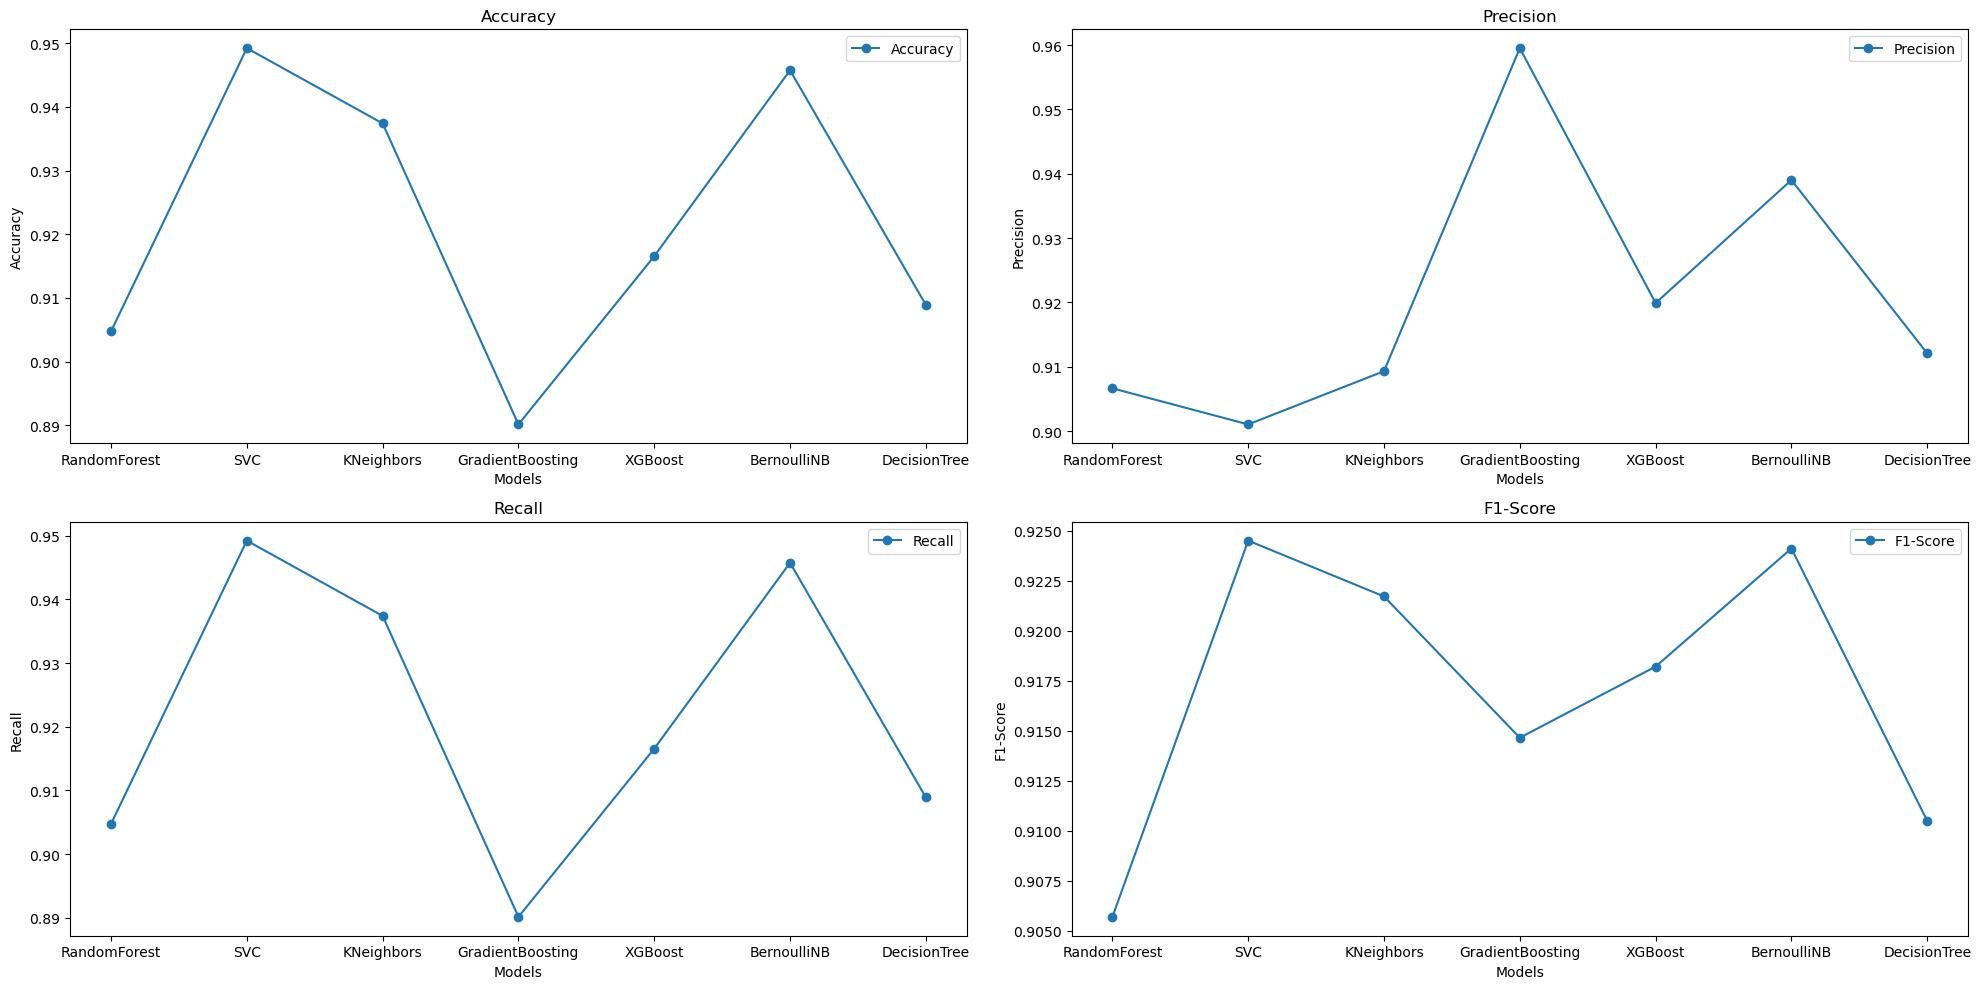

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0, 0].plot(mod, accuracy_scores, label='Accuracy', marker='o')
axes[0, 0].set_xlabel("Models")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_title("Accuracy")
axes[0, 0].legend()

axes[0, 1].plot(mod, precision_scores, label='Precision', marker='o')
axes[0, 1].set_xlabel("Models")
axes[0, 1].set_ylabel("Precision")
axes[0, 1].set_title("Precision")
axes[0, 1].legend()

axes[1, 0].plot(mod, recall_scores, label='Recall', marker='o')
axes[1, 0].set_xlabel("Models")
axes[1, 0].set_ylabel("Recall")
axes[1, 0].set_title("Recall")
axes[1, 0].legend()

axes[1, 1].plot(mod, f1_scores, label='F1-Score', marker='o')
axes[1, 1].set_xlabel("Models")
axes[1, 1].set_ylabel("F1-Score")
axes[1, 1].set_title("F1-Score")
axes[1, 1].legend()

plt.tight_layout()

plt.show()

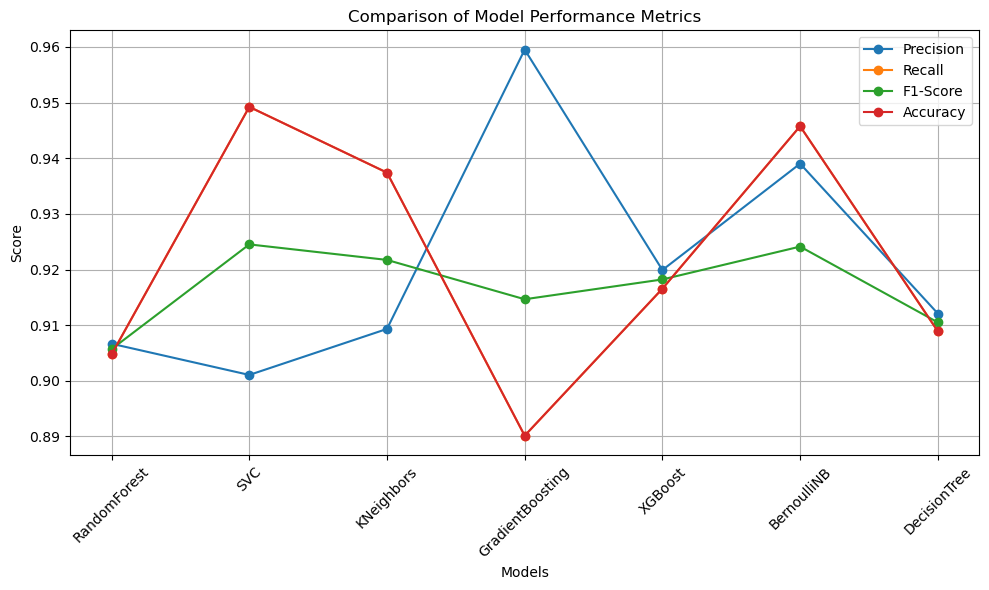

In [38]:
plt.figure(figsize=(10, 6))

plt.plot(mod, precision_scores, label='Precision', marker='o')
plt.plot(mod, recall_scores, label='Recall', marker='o')
plt.plot(mod, f1_scores, label='F1-Score', marker='o')
plt.plot(mod, accuracy_scores, label='Accuracy', marker='o')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Comparison of Model Performance Metrics")

plt.legend()

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

**Confusion Matrix**

RandomForest :


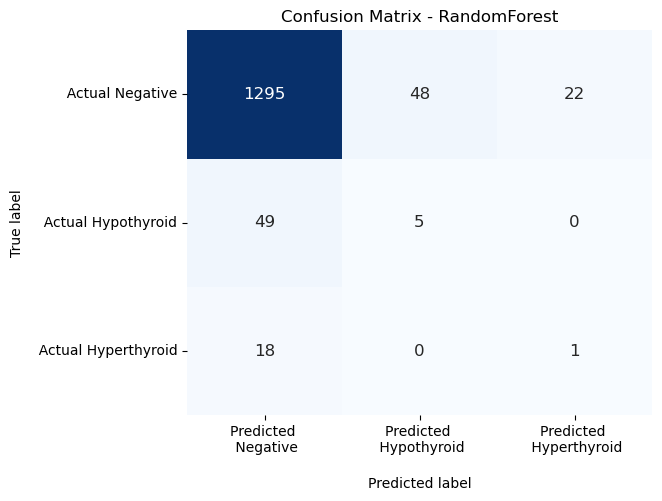

SVC :


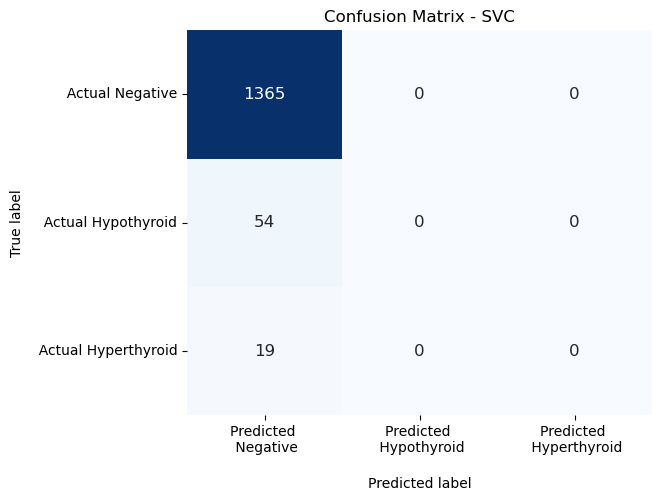

KNeighbors :


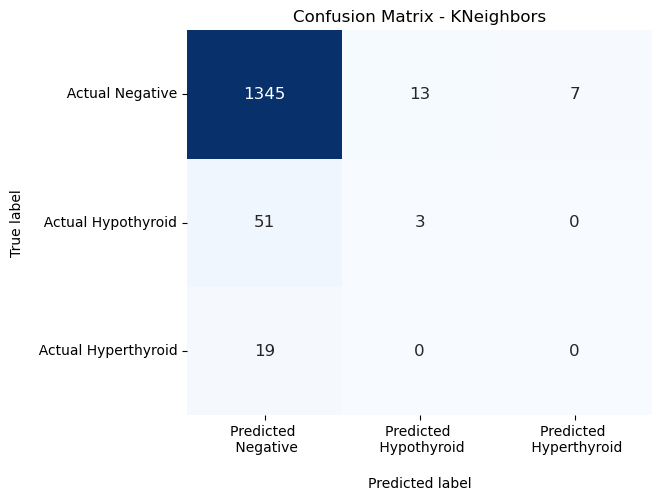

GradientBoosting :


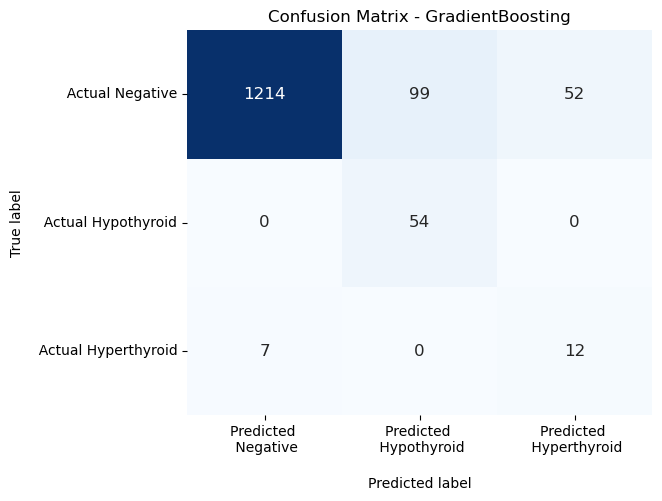

XGBoost :


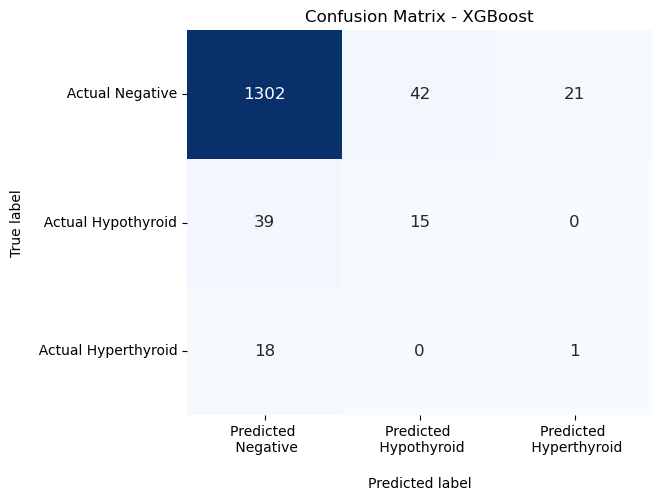

BernoulliNB :


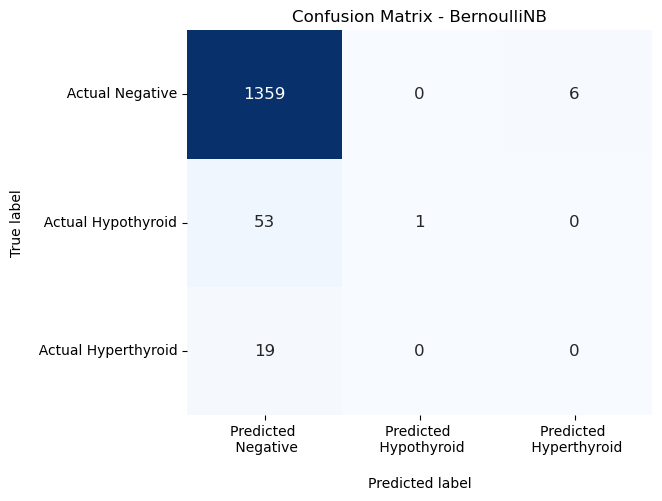

DecisionTree :


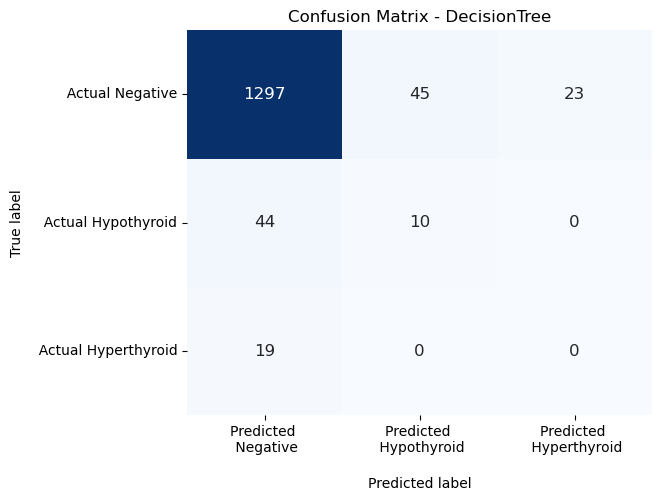

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = {
    0: 'Negative',
    1: 'Hypothyroid',
    2: 'Hyperthyroid'
}

for model_name, model in models.items():

    y_pred = model.predict(X_test)

    print(model_name, ":")

    cm = confusion_matrix(y_test, y_pred)

    unique_labels = sorted(set(y_test))
    tick_labels = [f"  Actual {class_labels[label]}" for label in unique_labels]
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", cbar=False,
                xticklabels=[f"Predicted \n {class_labels[label]}" for label in unique_labels],
                yticklabels=tick_labels, annot_kws={"size": 12})
    plt.xlabel("\nPredicted label")
    plt.ylabel("True label")
    plt.xticks(rotation=0)
    
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


**ROC AND PRECISION-RECALL CURVE FOR ALL THE MODELS**

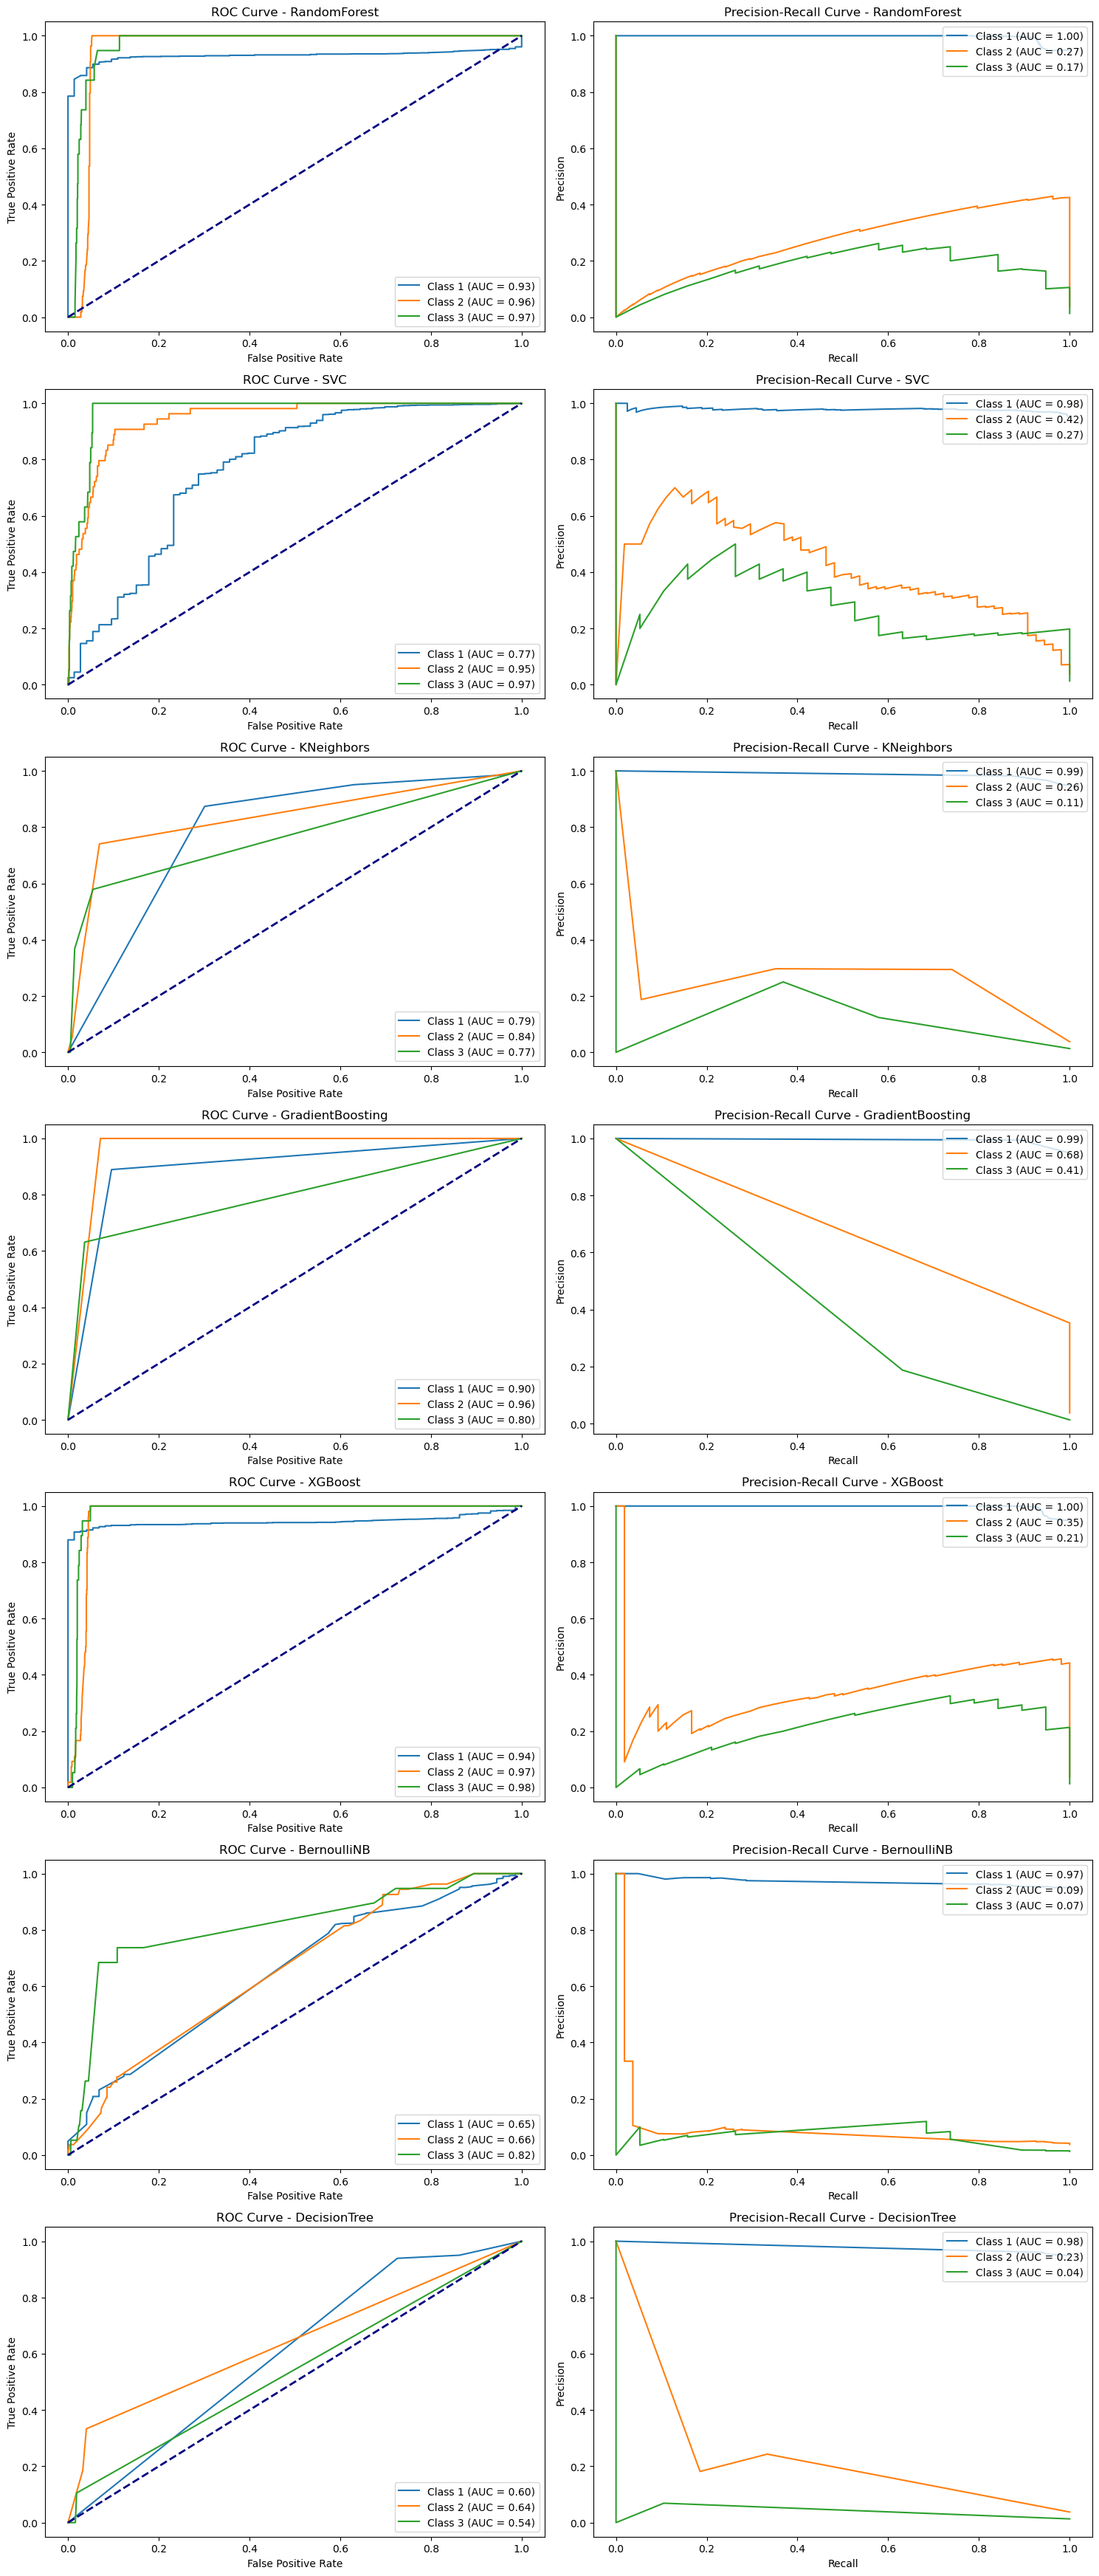

In [40]:
fig, axes = plt.subplots(7, 2, figsize=(15, 5 * 7))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
 
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)
    else:
        y_pred_prob = model.decision_function(X_test)

   
    ax_roc = axes[i * 2]

    if len(np.unique(y_test)) > 2:
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

      
        for j in range(y_test_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, j], y_pred_prob[:, j])
            roc_auc = auc(fpr, tpr)
            ax_roc.plot(fpr, tpr, label=f'Class {j + 1} (AUC = {roc_auc:.2f})')
    else:
    
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
        roc_auc = auc(fpr, tpr)
        ax_roc.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

    ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'ROC Curve - {model_name}')
    ax_roc.legend(loc='lower right')

 
    ax_pr = axes[i * 2 + 1]

   
    if len(np.unique(y_test)) > 2:
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

        for j in range(y_test_bin.shape[1]):
            precision, recall, _ = precision_recall_curve(y_test_bin[:, j], y_pred_prob[:, j])
            pr_auc = auc(recall, precision)
            ax_pr.plot(recall, precision, label=f'Class {j + 1} (AUC = {pr_auc:.2f})')
    else:
  
        precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:, 1])
        pr_auc = auc(recall, precision)
        ax_pr.plot(recall, precision, label=f'AUC = {pr_auc:.2f}')

    ax_pr.set_xlabel('Recall')
    ax_pr.set_ylabel('Precision')
    ax_pr.set_title(f'Precision-Recall Curve - {model_name}')
    ax_pr.legend(loc='upper right')

plt.tight_layout()
plt.show()


**COMPARING AND VISUALISING LSTM MODEL AND ANN MODEL BASED ON THEIR PRECISION,RECALL,F1-SCORE AND THEIR ACCURACY**

In [41]:
y_pred = lstm.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
results(y_test,y_pred_binary)

45/45 [==============================] - 1s 2ms/step
Precision: 91.53%
Recall: 94.16%
F1-Score: 92.78%
Accuracy: 94.16%



In [42]:
y_pred = ann.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)
y_test = np.array(y_test)
results(y_test,y_pred_classes)

45/45 [==============================] - 0s 2ms/step
Precision: 90.17%
Recall: 94.92%
F1-Score: 92.48%
Accuracy: 94.92%



In [43]:
labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

In [44]:
lstm_metrics = [
    precision_score(y_test, y_pred_binary, average='weighted', zero_division=0),
    recall_score(y_test, y_pred_binary, average='weighted'),
    f1_score(y_test, y_pred_binary, average='weighted'),
    accuracy_score(y_test, y_pred_binary)
]

In [45]:
ann_metrics = [
    precision_score(y_test, y_pred_classes, average='weighted', zero_division=0),
    recall_score(y_test, y_pred_classes, average='weighted'),
    f1_score(y_test, y_pred_classes, average='weighted'),
    accuracy_score(y_test, y_pred_classes)
]

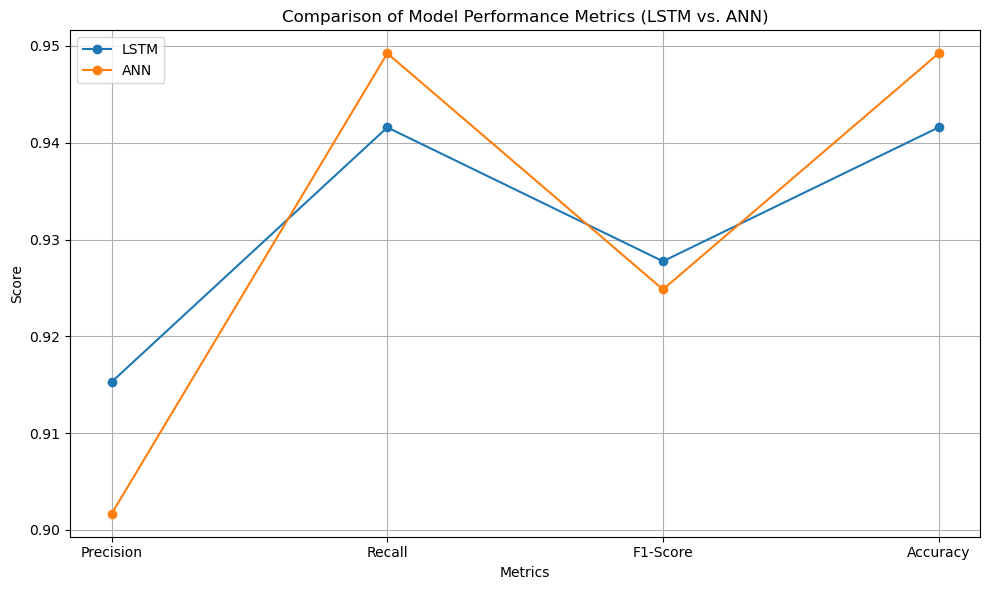

In [46]:
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))

plt.plot(x, lstm_metrics, label='LSTM', marker='o')
plt.plot(x, ann_metrics, label='ANN', marker='o')

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Comparison of Model Performance Metrics (LSTM vs. ANN)")

plt.legend()
plt.xticks(x, labels)

plt.grid(True)
plt.tight_layout()
plt.show()

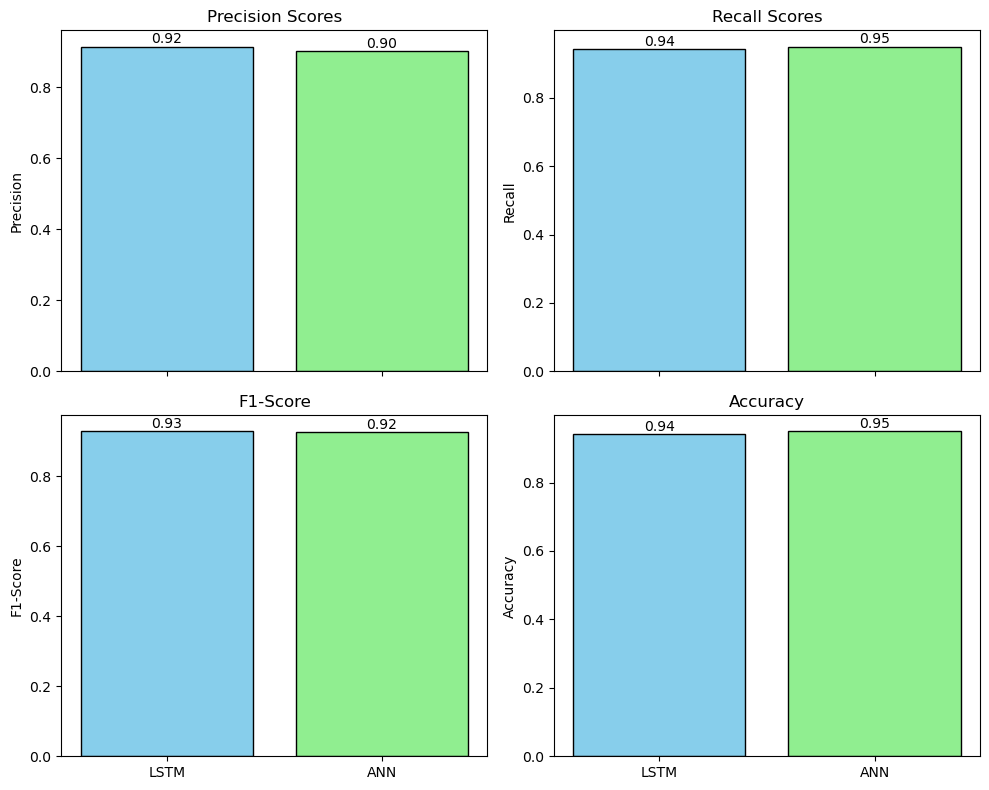

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True)


axs[0, 0].bar(['LSTM', 'ANN'], [lstm_metrics[0], ann_metrics[0]], color=['skyblue', 'lightgreen'], edgecolor='black')
axs[0, 0].set_title('Precision Scores')
axs[0, 0].set_ylabel('Precision')

for i, v in enumerate([lstm_metrics[0], ann_metrics[0]]):
    axs[0, 0].text(i, v + 0.0005, f'{v:.2f}', ha='center', va='bottom')

axs[0, 1].bar(['LSTM', 'ANN'], [lstm_metrics[1], ann_metrics[1]], color=['skyblue', 'lightgreen'], edgecolor='black')
axs[0, 1].set_title('Recall Scores')
axs[0, 1].set_ylabel('Recall')


for i, v in enumerate([lstm_metrics[1], ann_metrics[1]]):
    axs[0, 1].text(i, v + 0.0005, f'{v:.2f}', ha='center', va='bottom')


axs[1, 0].bar(['LSTM', 'ANN'], [lstm_metrics[2], ann_metrics[2]], color=['skyblue', 'lightgreen'], edgecolor='black')
axs[1, 0].set_title('F1-Score')
axs[1, 0].set_ylabel('F1-Score')


for i, v in enumerate([lstm_metrics[2], ann_metrics[2]]):
    axs[1, 0].text(i, v + 0.0005, f'{v:.2f}', ha='center', va='bottom')


axs[1, 1].bar(['LSTM', 'ANN'], [lstm_metrics[3], ann_metrics[3]], color=['skyblue', 'lightgreen'], edgecolor='black')
axs[1, 1].set_title('Accuracy')
axs[1, 1].set_ylabel('Accuracy')


for i, v in enumerate([lstm_metrics[3], ann_metrics[3]]):
    axs[1, 1].text(i, v + 0.0005, f'{v:.2f}', ha='center', va='bottom')


plt.subplots_adjust(wspace=0.5, hspace=0.5)


for ax in axs.flat:
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


**ROC AND PRECISION-RECALL CURVE FOR LSTMM AND ANN MODEL**

In [48]:
y_test_binary = (y_test > 0.5).astype(int)
y_pred_binary_binary = (y_pred_binary > 0.5).astype(int)
y_pred_classes_binary = (y_pred_classes > 0.5).astype(int)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_binary, y_pred_binary_binary)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

precision_lstm, recall_lstm, _ = precision_recall_curve(y_test_binary, y_pred_binary_binary)
accuracy_lstm = accuracy_score(y_test_binary, y_pred_binary_binary)


fpr_ann, tpr_ann, _ = roc_curve(y_test_binary, y_pred_classes_binary)
roc_auc_ann = auc(fpr_ann, tpr_ann)

precision_ann, recall_ann, _ = precision_recall_curve(y_test_binary, y_pred_classes_binary)
accuracy_ann = accuracy_score(y_test_binary, y_pred_classes_binary)

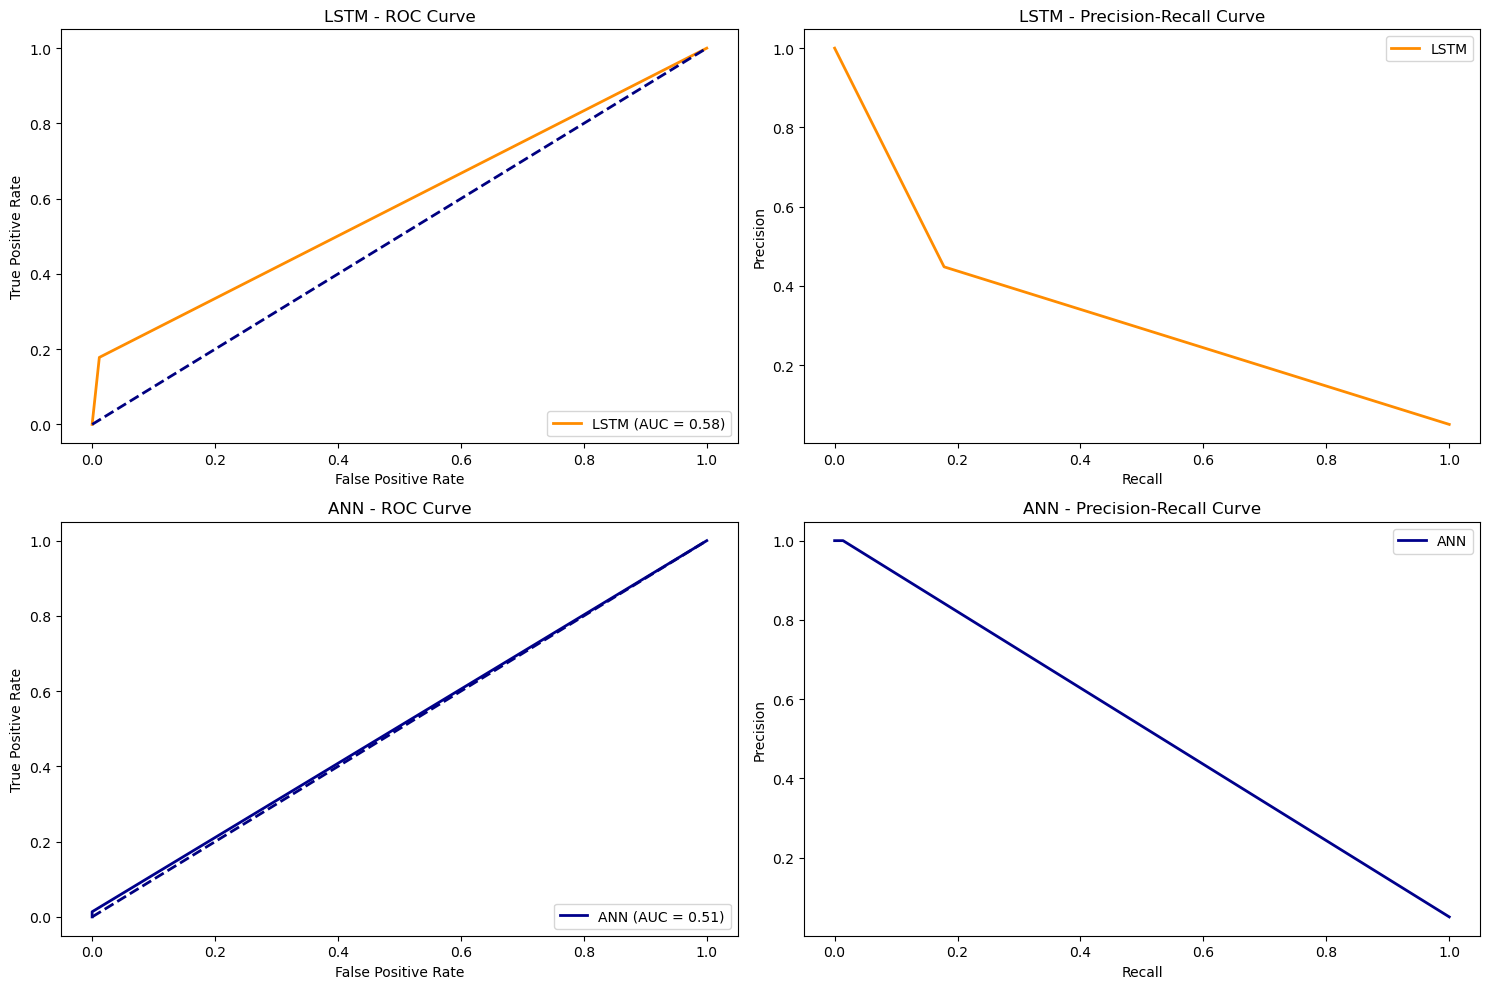

In [49]:
plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM - ROC Curve')
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.plot(recall_lstm, precision_lstm, color='darkorange', lw=2, label='LSTM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LSTM - Precision-Recall Curve')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
plt.plot(fpr_ann, tpr_ann, color='darkblue', lw=2, label=f'ANN (AUC = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN - ROC Curve')
plt.legend(loc='lower right')

plt.subplot(2, 2, 4)
plt.plot(recall_ann, precision_ann, color='darkblue', lw=2, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('ANN - Precision-Recall Curve')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
